In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Downloading and unarchiving data

## cloning github  repositry that contains Tacotron 2


In [ ]:
! git clone https://github.com/nipponjo/tts-arabic-pytorch

Cloning into 'tts-arabic-pytorch'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 285 (delta 36), reused 44 (delta 23), pack-reused 209
Receiving objects: 100% (285/285), 4.36 MiB | 3.66 MiB/s, done.
Resolving deltas: 100% (127/127), done.


## Downloading Pretrained model

In [ ]:
!gdown 1FD2J-xUk48JPF9TeS8ZKHzDC_ZNBfLd8&

Downloading...
From: https://drive.google.com/uc?id=1FD2J-xUk48JPF9TeS8ZKHzDC_ZNBfLd8
To: /content/ar-tts-models.zip
100% 633M/633M [00:05<00:00, 108MB/s] 


In [ ]:
!unzip ar-tts-models.zip -d tts-arabic-pytorch/pretrained/

Archive:  ar-tts-models.zip
   creating: tts-arabic-pytorch/pretrained/diacritizers/
  inflating: tts-arabic-pytorch/pretrained/diacritizers/shakkala_second_model6.pth  
  inflating: tts-arabic-pytorch/pretrained/diacritizers/shakkelha_rnn_3_big_20.pth  
  inflating: tts-arabic-pytorch/pretrained/fastpitch_ar_adv.pth  
  inflating: tts-arabic-pytorch/pretrained/fastpitch_ar_mse.pth  
replace tts-arabic-pytorch/pretrained/hifigan-asc-v1/config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tts-arabic-pytorch/pretrained/hifigan-asc-v1/config.json  
  inflating: tts-arabic-pytorch/pretrained/hifigan-asc-v1/hifigan-asc.pth  
  inflating: tts-arabic-pytorch/pretrained/tacotron2_ar_adv.pth  
  inflating: tts-arabic-pytorch/pretrained/tacotron2_ar_mse.pth  


## Downloading finetuneing dataset


In [ ]:
!gdown 13fSAkLtqaJPjkg8UaHXI7mcJFMyZLqJp

Downloading...
From: https://drive.google.com/uc?id=13fSAkLtqaJPjkg8UaHXI7mcJFMyZLqJp
To: /content/ClarTTS_corpus.zip
100% 2.76G/2.76G [00:28<00:00, 96.4MB/s]


In [ ]:
!unzip ClarTTS_corpus.zip -d tts-arabic-pytorch

Streaming output truncated to the last 5000 lines.
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_537.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_538.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_539.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_54.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_540.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_541.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_542.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_543.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_544.wav  
  inflating: tts-arabic-pytorch/ClarTTS_corpus/wav/train/ch_11_arabic_tts_dataset_545.wav  
  inflating: tts-arabic-pytorc

#preprocessing finetuning dataset

In [ ]:
#Choosing directory to work on

import os
os.chdir('/content/tts-arabic-pytorch')

### Preprocessing Text

In [ ]:
# Opening training and validation datasets

with open('/content/tts-arabic-pytorch/ClarTTS_corpus/training.txt', 'r', encoding='utf-16') as file:
  train_data = file.readlines()

with open('/content/tts-arabic-pytorch/ClarTTS_corpus/validation.txt', 'r', encoding='utf-16') as file:
    val_data = file.readlines()


In [ ]:
train_data = [line.strip().split('|') for line in train_data]
val_data = [line.strip().split('|') for line in val_data]

In [ ]:
for line in train_data[:5]:
  print(line)

['ch_00_arabic_tts_dataset_1', '.هَذَاالتَّسْجِيل .مِنْ طَرَفِ لربّري بُوكْس .جَمِيع تَسَّجِيلَات لربّري بُوكْس']
['ch_00_arabic_tts_dataset_10', '.خَاتَمِ الرُّسُلِ وَالْأَنْبِيَاءِ .وَعَلَى آلِهِ أَصْحَابِه الْأَتْقِيَاء']
['ch_00_arabic_tts_dataset_11', '.أَمَّا بَعْدُ .فَإِنَّ شَرَفَ الْمَطْلُوبِ .بِشَرَفِ نَتَائِجِهِ وَعِظَمِ خَطَرِهِ بِكَثْرَةِ مَنَافِعِهِ']
['ch_00_arabic_tts_dataset_12', '.وَبِحَسَبِ مَنَافِعِهِ تَجِبُ الْعِنَايَةُ بِهِ']
['ch_00_arabic_tts_dataset_13', '.وَعَلَى قَدْرِ الْعِنَايَةِ يَكُونُ اجْتِنَاءُ ثَمَرَتِهِ']


In [ ]:
import pandas as pd


# Create a data frame from the content of the .txt file
train_data = pd.DataFrame(train_data, columns=['filename', 'text'])
val_data = pd.DataFrame(val_data, columns=['filename', 'text'])

# Display the data frame
train_data.head(10)

,filename,text
0,ch_00_arabic_tts_dataset_1,.هَذَاالتَّسْجِيل .مِنْ طَرَفِ لربّري بُوكْس ....
1,ch_00_arabic_tts_dataset_10,.خَاتَمِ الرُّسُلِ وَالْأَنْبِيَاءِ .وَعَلَى آ...
2,ch_00_arabic_tts_dataset_11,.أَمَّا بَعْدُ .فَإِنَّ شَرَفَ الْمَطْلُوبِ .ب...
3,ch_00_arabic_tts_dataset_12,.وَبِحَسَبِ مَنَافِعِهِ تَجِبُ الْعِنَايَةُ بِهِ
4,ch_00_arabic_tts_dataset_13,.وَعَلَى قَدْرِ الْعِنَايَةِ يَكُونُ اجْتِنَاء...
5,ch_00_arabic_tts_dataset_14,.وَأَعْظَمُ الْأُمُورِ خَطَرًا وَقَدْرًا وَأَع...
6,ch_00_arabic_tts_dataset_15,.مَا اسْتَقَامَ بِهِ الدَّيْنُ وَالدُّنْيَا .و...
7,ch_00_arabic_tts_dataset_16,.لِأَنَّ بِاسْتِقَامَةِ الدِّينِ تَصِحُّ الْعِ...
8,ch_00_arabic_tts_dataset_17,.وَبِصَلَاحِ الدُّنْيَا تَتِمُّ السَّعَادَةُ ....
9,ch_00_arabic_tts_dataset_18,.َوَتَفْصِيلَ مَا أُجْمِلَ مِنْ أَحْوَالِهِمَا...


In [ ]:
import text


#Helper function that turns arabic text into phonemes
def preprocess(txt):
  t_phon = text.arabic_to_buckwalter(txt)
  t_phon = text.buckwalter_to_phonemes(t_phon)
  return t_phon

In [ ]:
train_phonemes,val_phonemes = [], []

for _, row in train_data.iterrows():
  row['filename'] += '.wav'
  train_phonemes.append(preprocess(row['text']))

for _,row in val_data.iterrows():
  row['filename'] += '.wav'
  val_phonemes.append(preprocess(row['text']))

In [ ]:
train_data = train_data.assign(Phonemes=train_phonemes)
val_data = val_data.assign(Phonemes=val_phonemes)

In [ ]:
train_data = train_data.drop('text', axis=1)
val_data = val_data.drop('text', axis=1)

In [ ]:
train_data.head()

,filename,Phonemes
0,ch_00_arabic_tts_dataset_1.wav,h a * aa aa tt a s j ii0 l + m i1 n + T A r a ...
1,ch_00_arabic_tts_dataset_10.wav,x AA t a m i0 + rr u0 s u0 l i0 + w a l < a n ...
2,ch_00_arabic_tts_dataset_11.wav,< a mm aa + b a E d u0 + f a < i0 nn a + $ a r...
3,ch_00_arabic_tts_dataset_12.wav,w a b i0 H a s a b i0 + m a n aa f i0 E i0 h i...
4,ch_00_arabic_tts_dataset_13.wav,w a E a l aa + q A d r i0 + l E i0 n aa y a t ...


In [ ]:
import csv

train_data.to_csv('ready_train.txt', sep=' ', header=None, index=None, quoting=csv.QUOTE_NONNUMERIC)
val_data.to_csv('ready_val.txt', sep=' ', header=None, index=None, quoting=csv.QUOTE_NONNUMERIC)

### Preprocessing Audio files

In [ ]:
#reading path for wav dataset
train_path = "/content/tts-arabic-pytorch/ClarTTS_corpus/wav/train/"
val_path = "/content/tts-arabic-pytorch/ClarTTS_corpus/wav/val/"

In [ ]:
# pairing wav dataset with text dataset
from utils.data import ArabDataset

train_dataset = ArabDataset('/content/tts-arabic-pytorch/ready_train.txt', train_path)
test_dataset = ArabDataset('/content/tts-arabic-pytorch/ready_val.txt', val_path)

[===========================   ] 90.7%invalid phonemes at line 9067: "ch_18_arabic_tts_dataset_43.wav" "aa n f a r i1 d + b i0 s i0 rr i1 k + w a l aaaa + t uu0 d i0 E h u0 + H aa z i0 m a n aa"
[==============================] 100.0%
[==============================] 100.0%


## Training Model

In [ ]:
import torch

#merges a list of samples to form a mini-batch of Tensor Used when using batched loading from a map-style dataset.
def text_mel_collate_fn(batch, pad_value=0):

    input_lens_sorted, input_sort_ids = torch.sort(
        torch.LongTensor([len(x[0]) for x in batch]),
        dim=0, descending=True)
    max_input_len = input_lens_sorted[0]

    num_mels = batch[0][1].size(0)
    max_target_len = max([x[1].size(1) for x in batch])

    text_ids_pad = torch.LongTensor(len(batch), max_input_len)
    mel_pad = torch.FloatTensor(len(batch), num_mels, max_target_len)
    gate_pad = torch.FloatTensor(len(batch), max_target_len)
    output_lengths = torch.LongTensor(len(batch))

    text_ids_pad.zero_(), mel_pad.fill_(pad_value), gate_pad.zero_()

    for i in range(len(input_sort_ids)):
        text_ids, mel = batch[input_sort_ids[i]]
        text_ids_pad[i, :text_ids.size(0)] = text_ids
        mel_pad[i, :, :mel.size(1)] = mel
        gate_pad[i, mel.size(1)-1:] = 1
        output_lengths[i] = mel.size(1)

    return text_ids_pad, input_lens_sorted, \
        mel_pad, gate_pad, output_lengths


In [ ]:
import torch.nn.functional as F
import random
from utils.training import batch_to_device, save_states

@torch.inference_mode()
def validate(model, test_loader, writer, device, n_iter):
    loss_sum = 0
    n_test_sum = 0

    model.eval()

    for batch in test_loader:
        text_padded, input_lengths, mel_padded, gate_padded, \
            output_lengths = batch_to_device(batch, device)

        y_pred = model(text_padded, input_lengths,
                       mel_padded, output_lengths,
                       torch.zeros_like(output_lengths))
        mel_out, mel_out_postnet, gate_pred, alignments = y_pred

        mel_loss = F.mse_loss(mel_out, mel_padded) + \
            F.mse_loss(mel_out_postnet, mel_padded)
        gate_loss = F.binary_cross_entropy_with_logits(gate_pred, gate_padded)
        loss = mel_loss + gate_loss

        loss_sum += mel_padded.size(0)*loss.item()
        n_test_sum += mel_padded.size(0)

    val_loss = loss_sum / n_test_sum

    idx = random.randint(0, mel_padded.size(0) - 1)
    mel_infer, *_ = model.infer(
        text_padded[idx:idx+1], input_lengths[idx:idx+1]*0, input_lengths[idx:idx+1])

    writer.add_sample(
        alignments[idx, :, :input_lengths[idx].item()],
        mel_out[idx], mel_padded[idx], mel_infer[0],
        output_lengths[idx], n_iter)

    writer.add_scalar('loss/val_loss', val_loss, n_iter)

    model.train()

    return val_loss

def training_loop(model,
                  optimizer,
                  train_loader,
                  test_loader,
                  writer,
                  device,
                  config,
                  n_epoch,
                  n_iter):

    model.train()
    net_config = {'n_mel_channels': 80,
              'n_symbols': 148,
              'padding_idx': 0,
              'symbols_embedding_dim': 384,
              'in_fft_n_layers': 6,
              'in_fft_n_heads': 1,
              'in_fft_d_head': 64,
              'in_fft_conv1d_kernel_size': 3,
              'in_fft_conv1d_filter_size': 1536,
              'in_fft_output_size': 384,
              'p_in_fft_dropout': 0.1,
              'p_in_fft_dropatt': 0.1,
              'p_in_fft_dropemb': 0.0,
              'out_fft_n_layers': 6,
              'out_fft_n_heads': 1,
              'out_fft_d_head': 64,
              'out_fft_conv1d_kernel_size': 3,
              'out_fft_conv1d_filter_size': 1536,
              'out_fft_output_size': 384,
              'p_out_fft_dropout': 0.1,
              'p_out_fft_dropatt': 0.1,
              'p_out_fft_dropemb': 0.0,
              'dur_predictor_kernel_size': 3,
              'dur_predictor_filter_size': 256,
              'p_dur_predictor_dropout': 0.1,
              'dur_predictor_n_layers': 2,
              'pitch_predictor_kernel_size': 3,
              'pitch_predictor_filter_size': 256,
              'p_pitch_predictor_dropout': 0.1,
              'pitch_predictor_n_layers': 2,
              'pitch_embedding_kernel_size': 3,
              'n_speakers': 1,
              'speaker_emb_weight': 1.0,
              'energy_predictor_kernel_size': 3,
              'energy_predictor_filter_size': 256,
              'p_energy_predictor_dropout': 0.1,
              'energy_predictor_n_layers': 2,
              'energy_conditioning': True,
              'energy_embedding_kernel_size': 3}
    for epoch in range(n_epoch, config.epochs):
        print(f"Epoch: {epoch}")
        for batch in train_loader:

            text_padded, input_lengths, mel_padded, gate_padded, \
                output_lengths = batch_to_device(batch, device)

            y_pred = model(text_padded, input_lengths,
                           mel_padded, output_lengths,
                           torch.zeros_like(output_lengths))
            mel_out, mel_out_postnet, gate_out, _ = y_pred

            optimizer.zero_grad()

            # LOSS
            mel_loss = F.mse_loss(mel_out, mel_padded) + \
                F.mse_loss(mel_out_postnet, mel_padded)
            gate_loss = F.binary_cross_entropy_with_logits(
                gate_out, gate_padded)
            loss = mel_loss + gate_loss

            loss.backward()
            grad_norm = torch.nn.utils.clip_grad_norm_(
                model.parameters(), config.grad_clip_thresh)
            optimizer.step()

            # LOGGING
            print(f"loss: {loss.item()}, grad_norm: {grad_norm.item()}")
            if n_iter % config.n_save_states_iter == 0:
                save_states(f'states.pth', model, optimizer, n_iter, epoch,
                net_config, config)

            if n_iter % config.n_save_backup_iter == 0 and n_iter > 0:
                save_states(f'states_{n_iter}.pth', model, optimizer, n_iter, epoch,
                net_config, config)

            n_iter += 1

        # VALIDATE
        val_loss = validate(model, test_loader, writer, device, n_iter)
        print(f"Validation loss: {val_loss}")




In [ ]:
class config(object):

  def __init__ (self,batch=8, epochs = 500, grad_clip_thresh = 1.0, learning_rate = 1.0e-5, weight_decay = 1.0e-8, max_step = 3000):
    self.epochs = epochs
    self.grad_clip_thresh = grad_clip_thresh
    self.learning_rate = learning_rate
    self.weight_decay = weight_decay
    self.max_step = max_step
    self.batch = batch
    self.n_save_states_iter = 100
    self.n_save_backup_iter = 1000
    self.checkpoint_dir = "/content/drive/MyDrive/Checkpoint"
    self.pretrained_dir = "/content/drive/MyDrive/Checkpoint/states.pth"


In [ ]:
config = config(batch=16)

In [ ]:
from torch.utils.data import DataLoader

# dataloaders
train_loader = DataLoader(train_dataset,
                              batch_size=config.batch,
                              collate_fn=text_mel_collate_fn,
                              shuffle=True, drop_last=True,
                              sampler=None)

test_loader = DataLoader(test_dataset,
                             batch_size=config.batch, drop_last=False,
                             shuffle=False, collate_fn=text_mel_collate_fn)

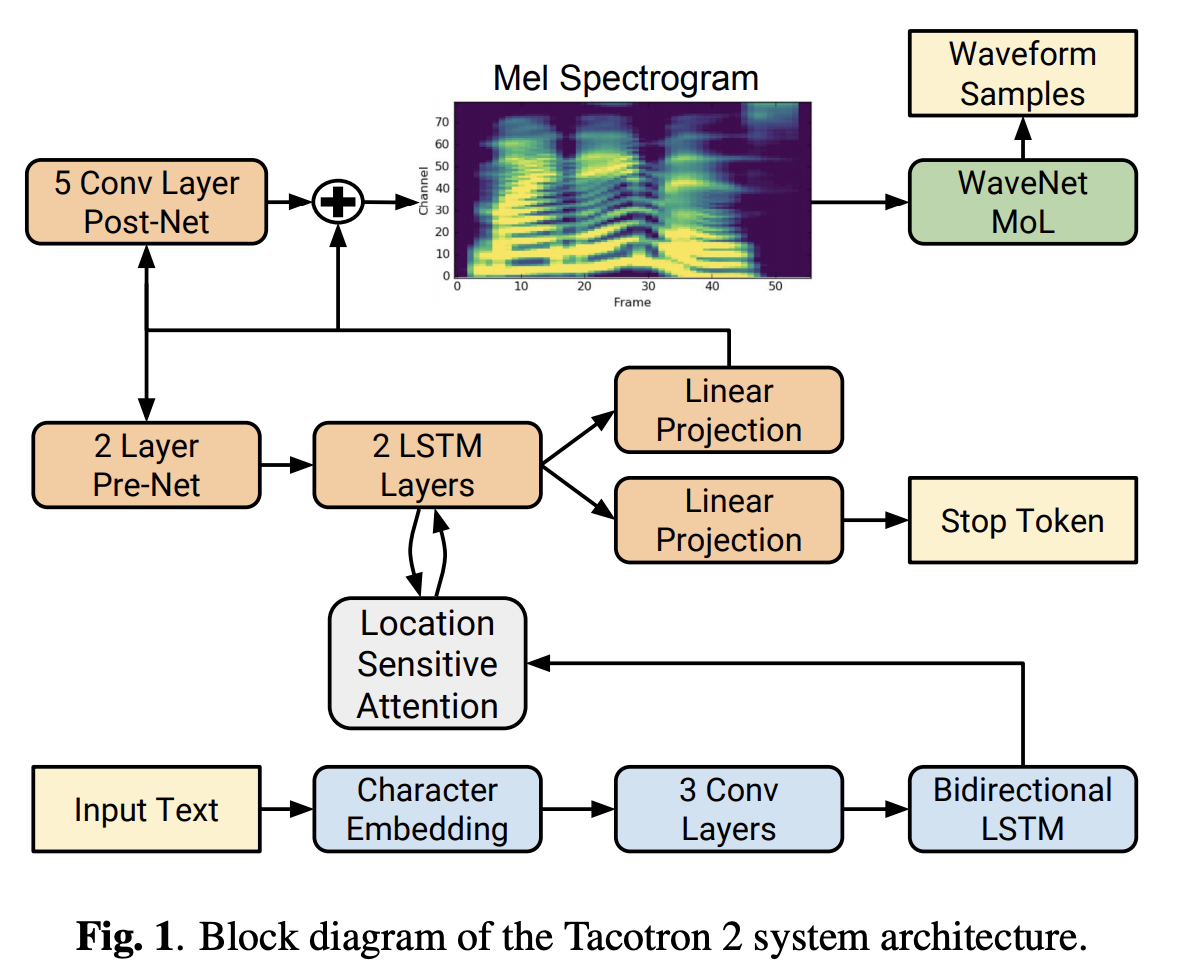

In [ ]:
from models.tacotron2.tacotron2_ms import Tacotron2MS
from utils.logging import TBLogger


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # construct model
model = Tacotron2MS(n_symbol=40)
model = model.to(device)
model.decoder.decoder_max_step = config.max_step

    # optimizer
optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=1.0e-3,
                                  weight_decay=config.weight_decay)

    # resume from existing checkpoint
n_epoch, n_iter = 0, 0


state_dicts = torch.load(config.pretrained_dir)
model.load_state_dict(state_dicts['model'])
if 'optim' in state_dicts:
      optimizer.load_state_dict(state_dicts['optim'])
if 'epoch' in state_dicts:
      n_epoch = state_dicts['epoch']
if 'iter' in state_dicts:
      n_iter = state_dicts['iter']


writer = TBLogger("checkpoints/exp_tc2_adv")
    # start training
training_loop(model,
                  optimizer,
                  train_loader,
                  test_loader,
                  writer,
                  device,
                  config,
                  n_epoch,
                  n_iter)



Epoch: 15
loss: 0.5569761395454407, grad_norm: 1.6584042310714722
loss: 0.3388919234275818, grad_norm: 0.5756651163101196
loss: 0.6225872039794922, grad_norm: 0.9417117834091187
loss: 0.39983105659484863, grad_norm: 0.5805824995040894
loss: 0.44914254546165466, grad_norm: 0.595055341720581
loss: 0.4717022180557251, grad_norm: 1.551395297050476
loss: 0.44630253314971924, grad_norm: 0.711114764213562
loss: 0.44930794835090637, grad_norm: 0.6478711366653442
loss: 0.5785003304481506, grad_norm: 1.5539700984954834
loss: 0.4935145378112793, grad_norm: 0.8800250291824341
loss: 0.6113276481628418, grad_norm: 1.3469988107681274
loss: 0.6657835245132446, grad_norm: 1.8853000402450562
loss: 0.49562501907348633, grad_norm: 1.0769999027252197
loss: 0.45791491866111755, grad_norm: 1.0956878662109375
loss: 0.4596365988254547, grad_norm: 0.5989701151847839
loss: 0.6077146530151367, grad_norm: 1.1685502529144287
loss: 0.4419010579586029, grad_norm: 0.4649050235748291
loss: 0.4999830722808838, grad_norm

/usr/local/lib/python3.10/dist-packages/torchaudio/models/tacotron2.py:856: UserWarning: Reached max decoder steps. The generated spectrogram might not cover the whole transcript.
  warnings.warn(


Validation loss: 0.7212117946076536
Epoch: 20
loss: 0.48264989256858826, grad_norm: 1.2212246656417847
loss: 0.5522323250770569, grad_norm: 2.6494665145874023
loss: 0.43248534202575684, grad_norm: 0.6122028827667236
loss: 0.5417860150337219, grad_norm: 0.8215253949165344
loss: 0.6532337069511414, grad_norm: 1.1002031564712524
loss: 0.4995935559272766, grad_norm: 1.722041130065918
loss: 0.356391966342926, grad_norm: 0.543130099773407
loss: 0.5056636929512024, grad_norm: 0.8476855754852295
loss: 0.6053750514984131, grad_norm: 1.1794674396514893
loss: 0.5540927648544312, grad_norm: 1.4071729183197021
loss: 0.26655304431915283, grad_norm: 0.353359192609787
loss: 0.5744946599006653, grad_norm: 1.1845502853393555
loss: 0.5271078944206238, grad_norm: 1.017724871635437
loss: 0.4676138460636139, grad_norm: 0.7722261548042297
loss: 0.6158579587936401, grad_norm: 0.9719520807266235
loss: 0.49776220321655273, grad_norm: 0.752121090888977
loss: 0.5516567826271057, grad_norm: 0.9793824553489685
loss

In [ ]:
import matplotlib.pyplot as plt
import IPython
from models.tacotron2 import Tacotron2Wave

model = Tacotron2Wave("/content/drive/MyDrive/Checkpoint/states.pth")
model = model.cuda()

wave, mel_spec = model.tts("فِي السَّنَةِ الثَّالِثَةِ مِنْ مُلْكِ يَهُويَاقِيمَ مَلِكِ يَهُوذَا، ذَهَبَ نَبُوخَذْنَاصَّرُ مَلِكُ بَابِلَ إِلَى أُورُشَلِيمَ وَحَاصَرَهَا.", return_mel=True, denoise=0.005)

print("Audio output (Tacotron2)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (Tacotron2)
